In [24]:
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold
from matplotlib import pyplot
from sklearn.preprocessing import StandardScaler

import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!git clone https://github.com/taehojo/data.git

Cloning into 'data'...


In [3]:
df = pd.read_csv('./data/pima-indians-diabetes3.csv')

In [4]:
df.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# 세부 정보
X = df.iloc[:,0:8]
X.head()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [6]:
# diabets 여부
y = df.iloc[:,8]
y.head()

0    1
1    0
2    1
3    0
4    1
Name: diabetes, dtype: int64

In [8]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,bmi,pedigree,age,diabetes
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# 데이터 스케일링
ss = StandardScaler()
scaled_X = pd.DataFrame(ss.fit_transform(X), columns=X.columns)
print(scaled_X)

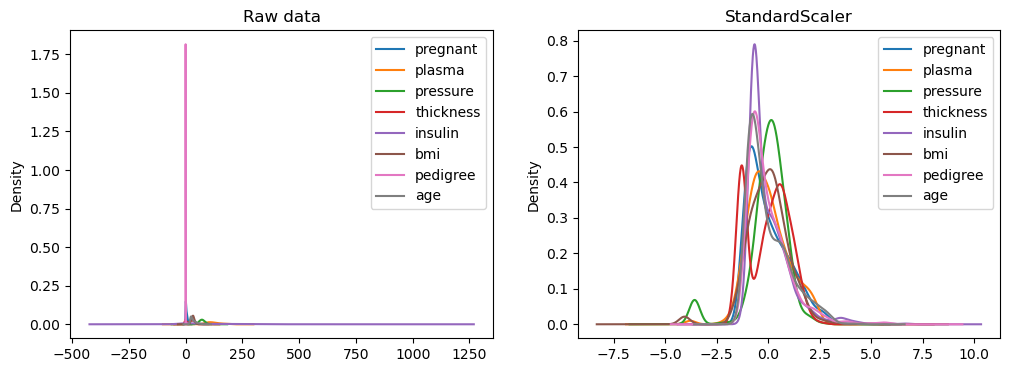

In [14]:
# 그래프 그리기
fig, ax = plt.subplots(1,2,figsize=(12,4))
X.plot(kind='kde', title='Raw data', ax=ax[0])
scaled_X.plot(kind='kde', title='StandardScaler', ax=ax[1])
plt.show()

In [15]:
## 훈련 세트와 테스트 셋 분할(75:25 비율로)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(576, 8) (576,)
(192, 8) (192,)


### 결정 트리 분류기로 학습

In [25]:
from sklearn.tree import DecisionTreeClassifier # 임포트
classifier = DecisionTreeClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)


Accuracy: 68.58 %
Standard Deviation: 5.61 %
[1 0 0 0 0 0 1 0 0 1 1 1 0 0 1 1 1 0 1 0 1 0 0 0 0 1 0 1 0 0 0 0 0 1 0 1 0
 0 0 1 1 0 0 1 1 0 0 0 1 0 1 1 1 1 0 0 0 1 0 1 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 1 0 1 0
 0 0 0 1 1 1 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 1 1 0 1 1 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0 0 0 0 1 0 1 1
 0 1 0 0 1 0 0]


### 랜덤 포레스트

In [26]:
# 랜덤 포레스트 분류기를 불러옵니다.
from sklearn.ensemble import RandomForestClassifier

# 학습 환경을 설정합니다.
classifier = RandomForestClassifier(n_estimators=50)
classifier.fit(X_train, y_train)
 
# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 75.52 %
Standard Deviation: 4.88 %


### 가우시안 나이브 베이즈

In [27]:
# 가우시안 나이브 베이즈 분류기를 불러옵니다.
from sklearn.naive_bayes import GaussianNB

# 학습 환경을 설정합니다.
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 74.99 %
Standard Deviation: 7.11 %


### k-최근접 이웃

In [29]:
# k-최근접 이웃 분류기를 불러옵니다.
from sklearn.neighbors import KNeighborsClassifier

# 학습 환경을 설정합니다.
classifier = KNeighborsClassifier() 
classifier.fit(X_train, y_train)

# 테스트셋에 적용합니다. 
y_pred = classifier.predict(X_test)

# 계층별 교차 검증 환경을 설정합니다. 
skf = StratifiedKFold(n_splits=10, shuffle=True)

# 교차 검증을 통해 정확도를 계산합니다. 
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

# 정확도와 표준편차를 출력합니다. 
print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 70.66 %
Standard Deviation: 5.18 %


c:\Users\Jasper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Jasper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

### 에이다 부스트

In [30]:
from sklearn.ensemble import AdaBoostClassifier # 임포트
classifier = AdaBoostClassifier() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 74.31 %
Standard Deviation: 3.49 %
[1 0 0 0 0 0 1 1 0 0 1 1 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 1 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 1 1 1 1 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


### 이차 판별 분석

In [31]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis # 임포트
classifier = QuadraticDiscriminantAnalysis() # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 73.25 %
Standard Deviation: 6.38 %
[1 0 0 0 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 1 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 1
 0 1 0 0 0 0 0]


### 서포트 벡터 머신

In [33]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='linear') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 75.33 %
Standard Deviation: 4.72 %
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 1 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 1 0 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


### 서포트 벡터 머신 - RPF 커널

In [34]:
from sklearn.svm import SVC # 임포트
classifier = SVC(kernel='rbf') # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 74.49 %
Standard Deviation: 5.90 %
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 0 0 0 0 0 0]


### 보팅

In [35]:
from sklearn.ensemble import VotingClassifier # 임포트
clf1 = AdaBoostClassifier()
clf2 = RandomForestClassifier()
clf3 = SVC(kernel='linear')

classifier = VotingClassifier(estimators=[('lr', clf1), ('rf', clf2), ('gnb', clf3)]) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 74.30 %
Standard Deviation: 2.98 %
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 0 0 1 0
 0 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 1 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


### 배깅

In [36]:
from sklearn.ensemble import BaggingClassifier # 임포트
classifier = BaggingClassifier(base_estimator=SVC(kernel='rbf'), n_estimators=10) # 객체 생성
classifier.fit(X_train, y_train) # 학습

y_pred = classifier.predict(X_test) # 테스트 셋 적용

skf = StratifiedKFold(n_splits=10, shuffle=True) # 교차검증 환경 설정
accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=skf)

print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

print(y_pred)

Accuracy: 74.13 %
Standard Deviation: 3.19 %
[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0
 0 0 1 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 0 0 0 0 0 1
 1 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 0 1 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0]


### 여러 알고리즘 성능을 한눈에 비교하기

In [41]:
classifiers = [DecisionTreeClassifier(), RandomForestClassifier(), GaussianNB(), KNeighborsClassifier(), SVC(kernel='linear'), SVC(kernel='rbf'), AdaBoostClassifier(), QuadraticDiscriminantAnalysis(), VotingClassifier(estimators=[('1', AdaBoostClassifier()), ('2', RandomForestClassifier()), ('3', SVC(kernel='linear'))]),BaggingClassifier(base_estimator=clf3, n_estimators=10, random_state=0)]

In [42]:
classifier_names=['D_tree', 'RF', 'GNB', 'KNN', 'Ada', 'QDA', 'SVM_l', 'SVM_k', 'Voting', 'Bagging']

In [43]:
modelaccuracies=[]
modelmeans=[]
modelnames=[]

In [46]:
classifier_data = zip(classifier_names, classifiers)
for classifier_name, classifier in classifier_data:
    skf = StratifiedKFold(n_splits=10, shuffle=True)
    accuracies = cross_val_score(classifier, X=X_train, y=y_train, cv=skf)
    print("Mean accuracy of", classifier_name, ": {:.2f} %".format(accuracies.mean()*100))
    modelaccuracies.append(accuracies)
    modelnames.append(classifier_name)
    modelmeans.append(accuracies.mean()*100)  

Mean accuracy of D_tree : 69.80 %
Mean accuracy of RF : 74.13 %
Mean accuracy of GNB : 75.00 %
Mean accuracy of KNN : 69.60 %


c:\Users\Jasper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
c:\Users\Jasper\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepd

Mean accuracy of Ada : 75.51 %
Mean accuracy of QDA : 74.84 %
Mean accuracy of SVM_l : 72.53 %
Mean accuracy of SVM_k : 72.73 %
Mean accuracy of Voting : 74.49 %


KeyboardInterrupt: 

<BarContainer object of 9 artists>

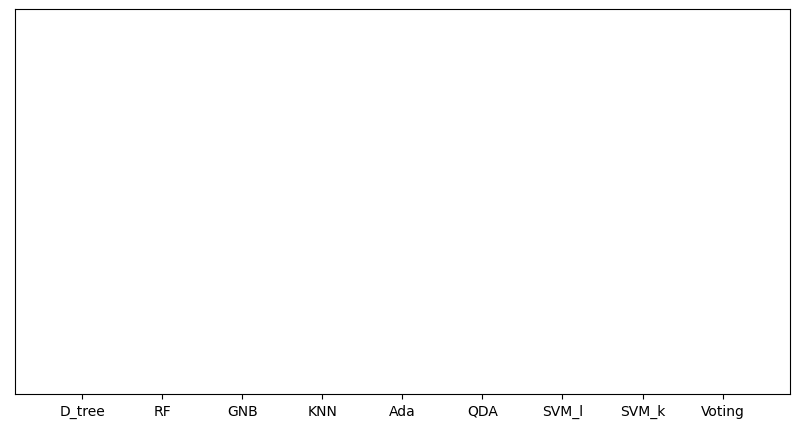

In [45]:
plt.figure(figsize=(10,5))
plt.ylim([60,80])
plt.bar(modelnames, modelnames)

In [ ]:
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(111)
ax.boxplot(modelaccuracies)
ax.set_xticklabels(modelnames)
plt.show()